Pranav Murthy 21BBS0059
#Task 1 and 2

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/sample_data/penguins_size.csv")

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#Task 3
##Univariate Analysis

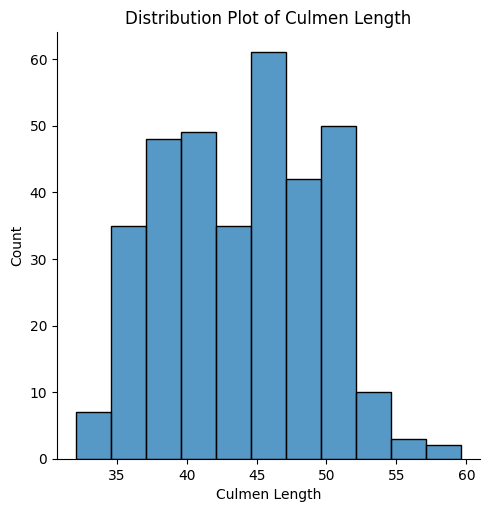

In [4]:
sns.displot(df['culmen_length_mm'])
plt.title('Distribution Plot of Culmen Length')
plt.xlabel('Culmen Length')
plt.show()

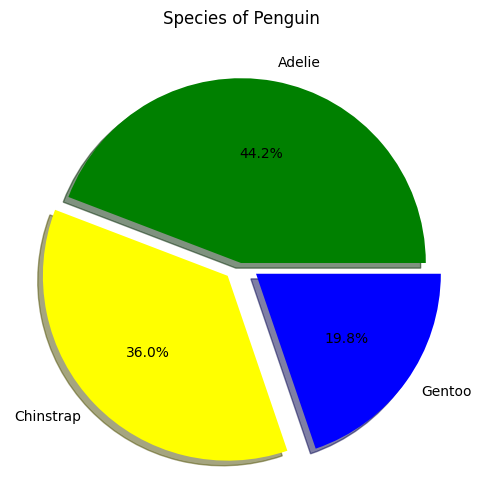

In [5]:
x = df.species.unique().tolist()
fig = plt.figure(figsize=(6,6))
fig.patch.set_facecolor('white')

plt.pie(df.species.value_counts(), [0,0.1,0.1], labels = x, autopct = '%1.1f%%', shadow= True, colors = ['green', 'yellow', 'blue'])
plt.title('Species of Penguin')
plt.show()

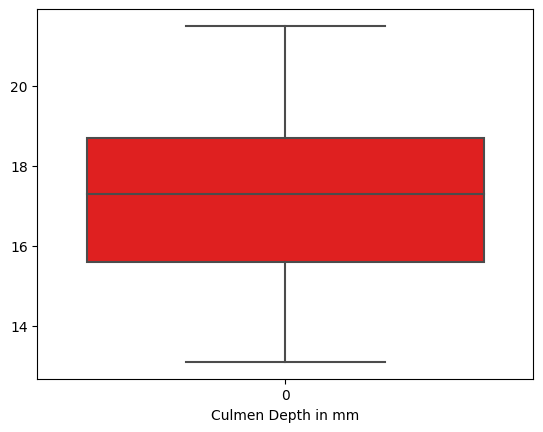

In [6]:
sns.boxplot(df.culmen_depth_mm, color = 'red')
plt.xlabel('Culmen Depth in mm')
plt.show()

##Bivariate Analysis

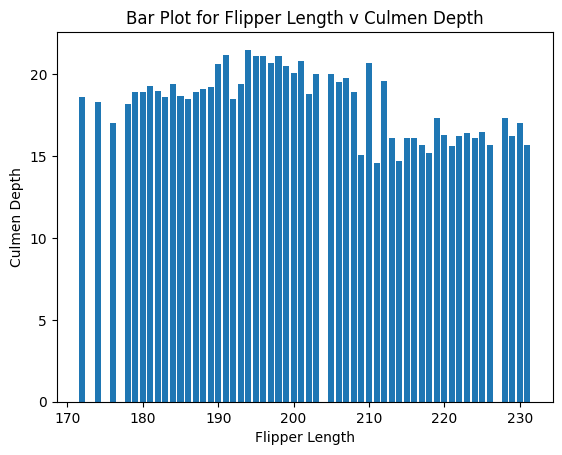

In [7]:
x = df['flipper_length_mm']
y = df['culmen_depth_mm']

plt.bar(x,y)
plt.title('Bar Plot for Flipper Length v Culmen Depth')
plt.xlabel('Flipper Length')
plt.ylabel('Culmen Depth')
plt.show()

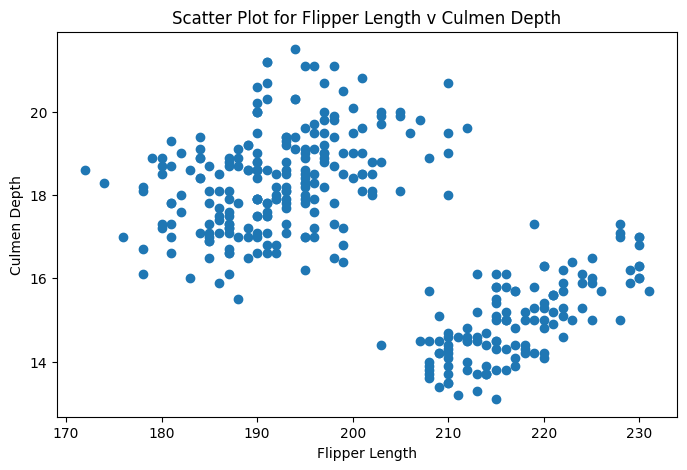

In [8]:
plt.figure(figsize = (8,5))
plt.scatter(x,y)
plt.title('Scatter Plot for Flipper Length v Culmen Depth')
plt.xlabel('Flipper Length')
plt.ylabel('Culmen Depth')
plt.show()

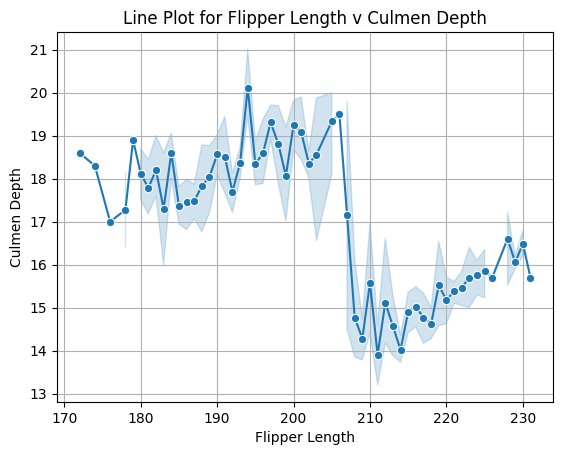

In [9]:
sns.lineplot(data = df,x=x,y=y,marker='o')
plt.title('Line Plot for Flipper Length v Culmen Depth')
plt.xlabel('Flipper Length')
plt.ylabel('Culmen Depth')
plt.grid(True)
plt.show()

##Multivariate Analysis

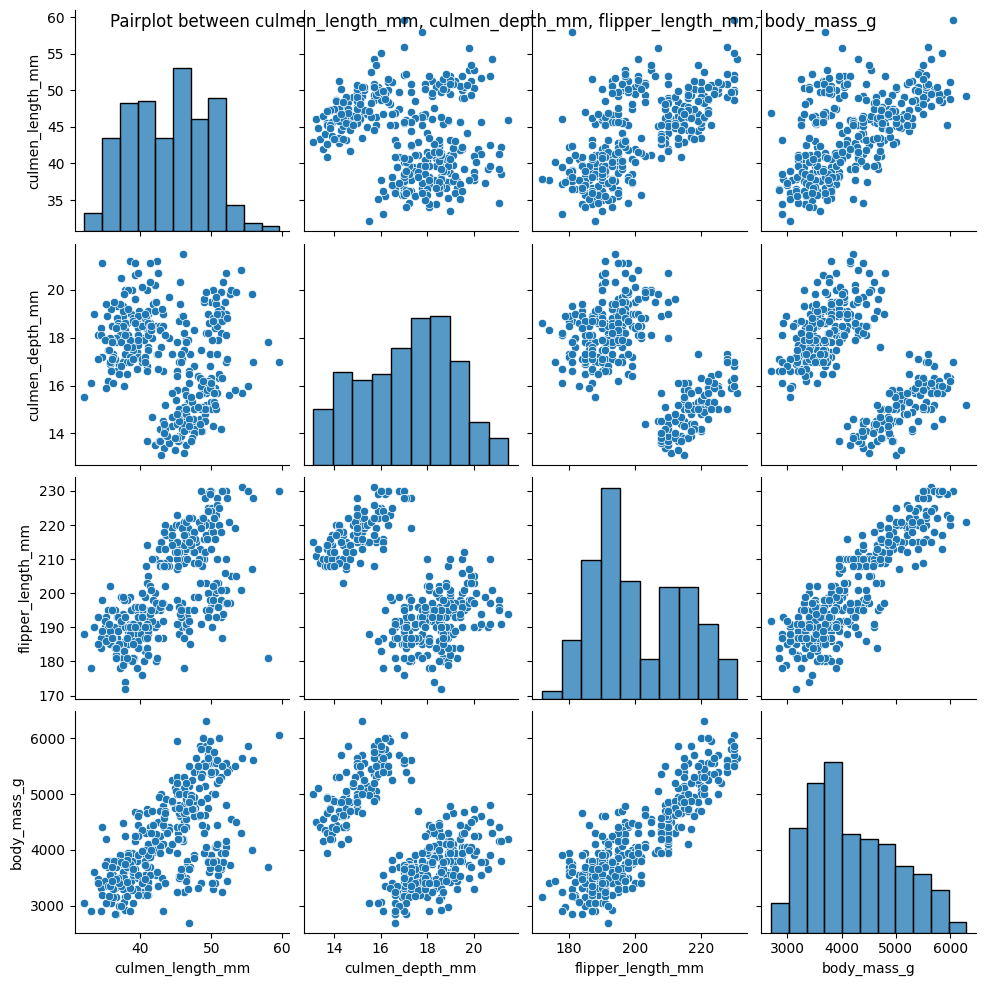

In [10]:
num = df.select_dtypes(include=['number']).columns.tolist()
g= sns.pairplot(df, vars = num)
g.fig.suptitle(f'Pairplot between {", ".join(num)}', ha = "center")
plt.show()

<ipython-input-11-7033cec4d240>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)


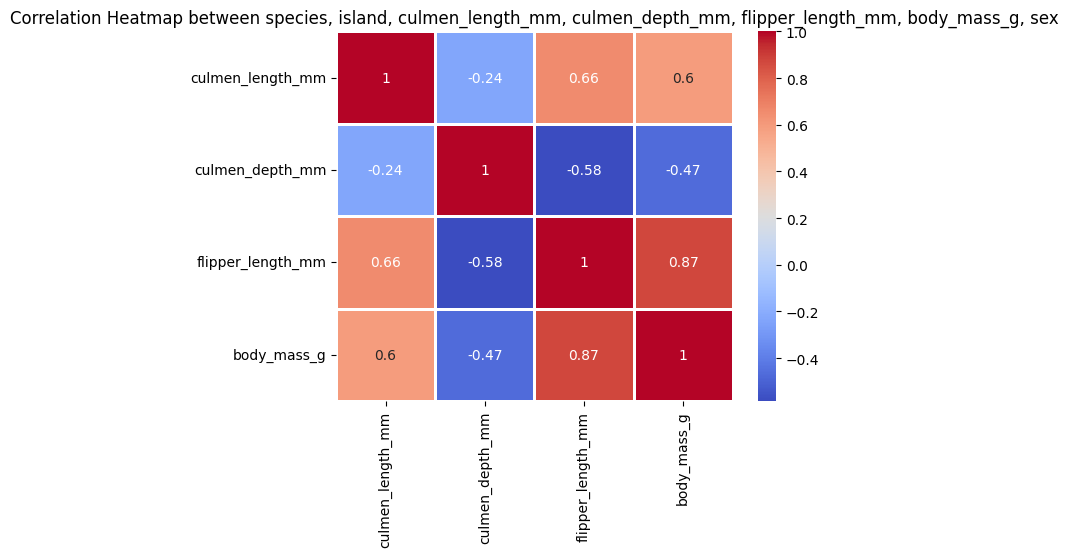

In [11]:
l=df.columns.tolist()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=1)
plt.title(f'Correlation Heatmap between {", ".join(l)}')
plt.show()

#Task 4

In [12]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


#Task 5

In [13]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [15]:
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)

z=str(df['sex'].mode().iloc[0])
df['sex'] = df['sex'].fillna(z)
df['sex'] = df['sex'].str.replace('.',z)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   344 non-null    float64
 3   culmen_depth_mm    344 non-null    float64
 4   flipper_length_mm  344 non-null    float64
 5   body_mass_g        344 non-null    float64
 6   sex                344 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


<ipython-input-15-11fa7a776463>:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['sex'] = df['sex'].str.replace('.',z)


#Task 6
Dots outside box plot means that there are outliers

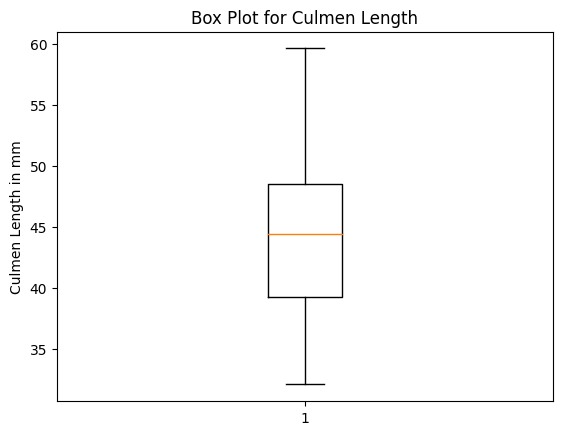

In [16]:
plt.boxplot(df['culmen_length_mm'])
plt.title('Box Plot for Culmen Length')
plt.ylabel('Culmen Length in mm')
plt.show()

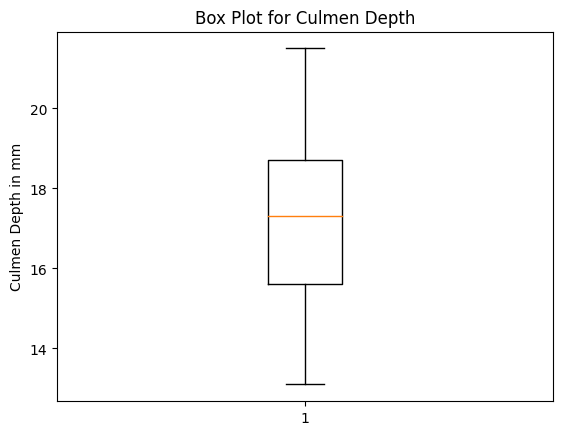

In [17]:
plt.boxplot(df['culmen_depth_mm'])
plt.title('Box Plot for Culmen Depth')
plt.ylabel('Culmen Depth in mm')
plt.show()


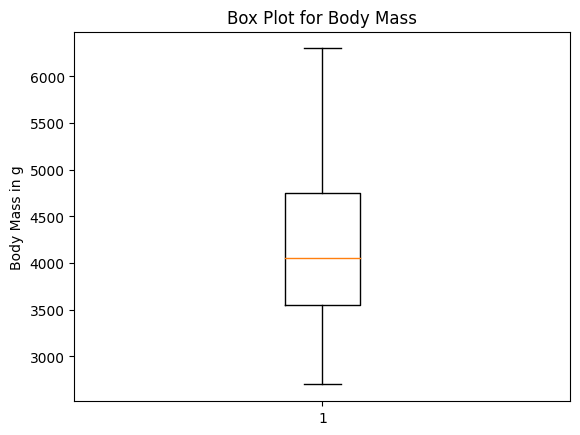

In [18]:
plt.boxplot(df['body_mass_g'])
plt.title('Box Plot for Body Mass')
plt.ylabel('Body Mass in g')
plt.show()

Hence there are no outliers to replace

#Task 8

(7 will be performed after 8)

In [21]:
le = LabelEncoder()

df.species = le.fit_transform(df.species)
df.island = le.fit_transform(df.island)
df.sex = le.fit_transform(df.sex)

df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,2
1,0,2,39.5,17.4,186.0,3800.0,1
2,0,2,40.3,18.0,195.0,3250.0,1
3,0,2,NaN,NaN,NaN,NaN,3
4,0,2,36.7,19.3,193.0,3450.0,1


#Task 7

In [22]:
df.corr().species.sort_values(ascending= False)

species              1.000000
flipper_length_mm    0.854307
body_mass_g          0.750491
culmen_length_mm     0.731369
sex                 -0.010379
island              -0.635659
culmen_depth_mm     -0.744076
Name: species, dtype: float64

#Task 9

In [23]:
#Dependent Variables
y = df['species']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [24]:
#Independent Variables
x=df.drop(columns =['species'],axis =1)
x.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.1,18.7,181.0,3750.0,2
1,2,39.5,17.4,186.0,3800.0,1
2,2,40.3,18.0,195.0,3250.0,1
3,2,NaN,NaN,NaN,NaN,3
4,2,36.7,19.3,193.0,3450.0,1


#Task 10

In [27]:
scale =StandardScaler()
x_scaled =pd.DataFrame(scale.fit_transform(x),columns = x.columns)
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.844076,-0.884499,0.785449,-1.418347,-0.564142,0.817011
1,1.844076,-0.811126,0.126188,-1.062250,-0.501703,-0.973127
2,1.844076,-0.664380,0.430462,-0.421277,-1.188532,-0.973127
3,1.844076,NaN,NaN,NaN,NaN,2.607148
4,1.844076,-1.324737,1.089724,-0.563715,-0.938776,-0.973127


#Task 11

In [29]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.3,random_state=10)

#Task 12

In [35]:
x_train.shape


(240, 6)

In [36]:
y_train.shape


(240,)

In [37]:
x_test.shape


(104, 6)

In [38]:
y_test.shape

(104,)